In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FaSaSu20/MLD6_Proy/master/src/nombre_paquete/database/data.csv") # Cargo otros datos parecidos
df["Fecha"] = pd.to_datetime(df['Fecha'].astype(str), format ='%Y-%m-%d %H:%M:%S')
df = df[["Fecha" ,"AGUA", "CARBON", "GAS", "LIQUIDOS", "PPP Bolsa diario"]]
df

,Fecha,AGUA,CARBON,GAS,LIQUIDOS,PPP Bolsa diario
0,2015-01-01,187.381526,123.225318,204.977354,971.700598,179.685917
1,2015-01-02,179.863045,119.771853,208.442936,971.705305,187.894382
2,2015-01-03,202.829047,123.878501,213.453856,971.381271,201.160360
3,2015-01-04,230.330204,124.526534,212.540171,947.097082,238.800040
4,2015-01-05,205.850445,125.271973,212.464471,979.080505,214.787935
...,...,...,...,...,...,...
2642,2022-03-27,182.604901,262.813092,697.442903,707.583803,249.882042
2643,2022-03-28,198.853818,262.813092,728.107974,707.583803,274.869332
2644,2022-03-29,202.910992,253.749212,709.119964,707.583803,281.697472
2645,2022-03-30,184.610429,258.967234,718.866090,707.583803,282.618263


In [3]:
x = df[["AGUA", "CARBON", "GAS", "LIQUIDOS"]]
y = df[["PPP Bolsa diario"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = False)

In [4]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
67/67 [==============================] - 4s 6ms/step - loss: 5529.5781
Epoch 2/50
67/67 [==============================] - 1s 8ms/step - loss: 4788.2261
Epoch 3/50
67/67 [==============================] - 1s 8ms/step - loss: 6800.1851
Epoch 4/50
67/67 [==============================] - 1s 9ms/step - loss: 5404.5029
Epoch 5/50
67/67 [==============================] - 1s 8ms/step - loss: 5093.4810
Epoch 6/50
67/67 [==============================] - 1s 9ms/step - loss: 5195.4961
Epoch 7/50
67/67 [==============================] - 0s 6ms/step - loss: 5972.0317
Epoch 8/50
67/67 [==============================] - 0s 6ms/step - loss: 5276.4751
Epoch 9/50
67/67 [==============================] - 0s 6ms/step - loss: 4593.2310
Epoch 10/50
67/67 [==============================] - 0s 6ms/step - loss: 4495.6885
Epoch 11/50
67/67 [==============================] - 0s 6ms/step - loss: 4711.8076
Epoch 12/50
67/67 [==============================] - 0s 6ms/step - loss: 4970.3989
Epoch 13/50
6

In [7]:
y_pred = model.predict(X_test)

17/17 [==============================] - 1s 3ms/step


# Metricas

In [8]:
mean_absolute_error(y_test, y_pred)

23.810577542069577

In [9]:
mean_squared_error(y_test, y_pred)

1399.8180107374865

In [10]:
mean_absolute_percentage_error(y_test, y_pred)

0.13537180600439117

In [11]:
r2_score(y_test, y_pred)

0.8858916094211834

<Axes: xlabel='Fecha', ylabel='PPP Bolsa diario'>

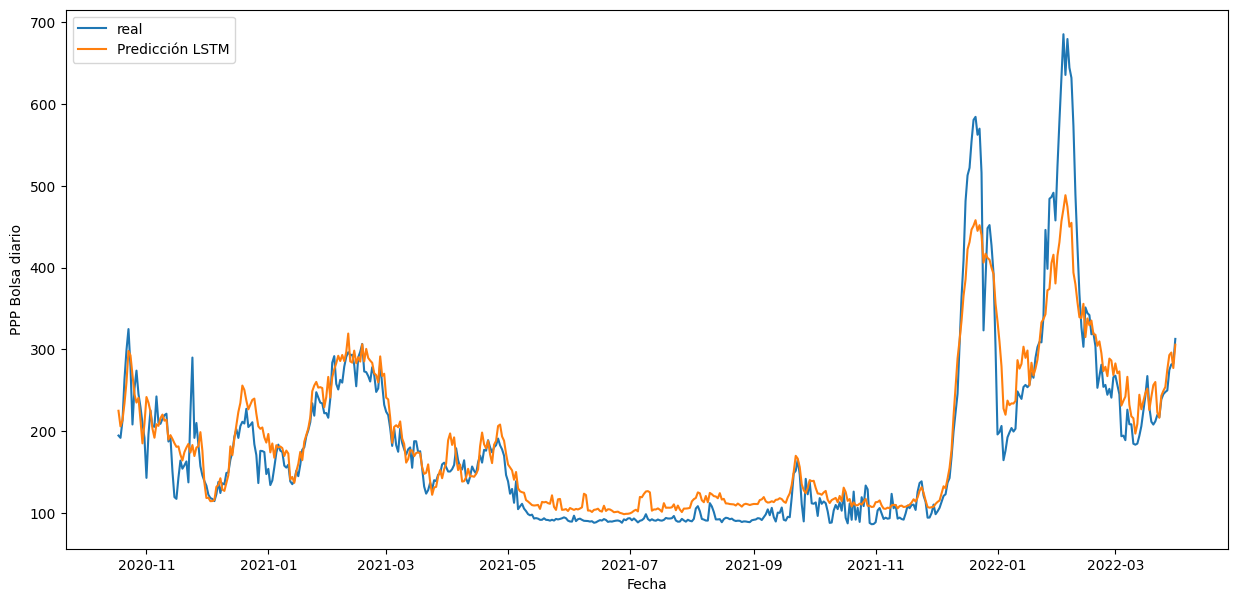

In [13]:
fig, axes = plt.subplots(figsize = (15, 7))
sns.lineplot(x = df["Fecha"].iloc[-len(X_test):], y = y_test["PPP Bolsa diario"], label = "real")
sns.lineplot(x = df["Fecha"].iloc[-len(X_test):], y = y_pred.flatten(), label = "Predicción LSTM")